In [522]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.preprocessing import scale

In [523]:
vehical=pd.read_csv('vehicle.csv')

In [524]:
vehical.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [525]:
#Assigning the values to class
vehical['class']=vehical['class'].map({'van':0,'car':1,'bus':2})

In [526]:
# spliting Feature and target
# Feature=vehical.drop(columns='class')
# Target=vehical['class']

In [527]:
vehical.info() # contain null values in some columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [528]:
# Finding null values
vehical.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [529]:
# droppping null values
vehical=vehical.dropna(axis=0)

In [530]:
vehical.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [531]:
vehical.info() # after remove the null values we have 813 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [532]:
vehical.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,93.656827,44.803198,82.04305,169.098401,61.774908,8.599016,168.563346,40.98893,20.558426,147.891759,188.377614,438.382534,174.252153,72.399754,6.351784,12.687577,188.979090,195.729397,1.012300
std,8.233751,6.146659,15.78307,33.615402,7.973000,4.677174,33.082186,7.80338,2.573184,14.504648,31.165873,175.270368,32.332161,7.475994,4.921476,8.926951,6.153681,7.398781,0.701754
min,73.000000,33.000000,40.00000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,87.000000,40.000000,70.00000,141.000000,57.000000,7.000000,146.000000,33.00000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000,1.000000
50%,93.000000,44.000000,79.00000,167.000000,61.000000,8.000000,157.000000,43.00000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000,1.000000
75%,100.000000,49.000000,98.00000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000,2.000000
max,119.000000,59.000000,112.00000,333.000000,138.000000,55.000000,265.000000,61.00000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000,2.000000


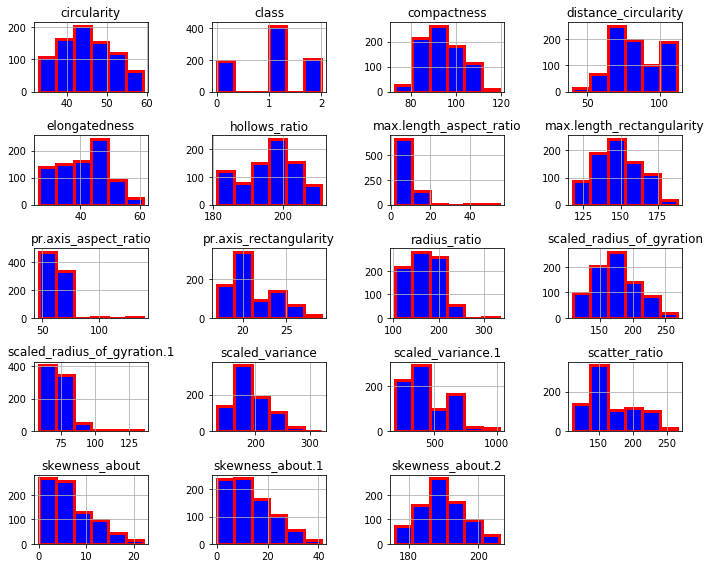

In [533]:
#understanding the range of the data
vehical.hist(figsize=(10,8),bins=6,color='b',linewidth='3',edgecolor='r')
plt.tight_layout()
plt.show()
# it seems data is distributed almost normally except for some  cases like max.length_aspect_ration pr.axis_aspect_ration....

compactness


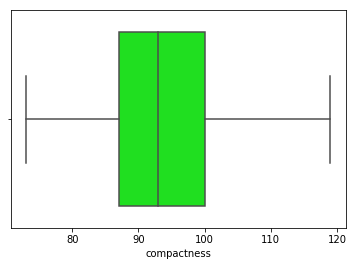

circularity


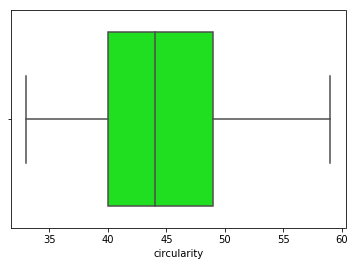

distance_circularity


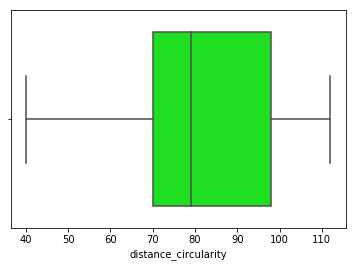

radius_ratio


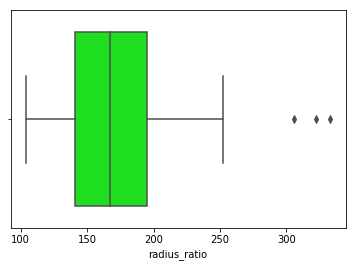

pr.axis_aspect_ratio


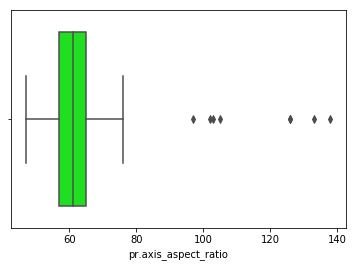

max.length_aspect_ratio


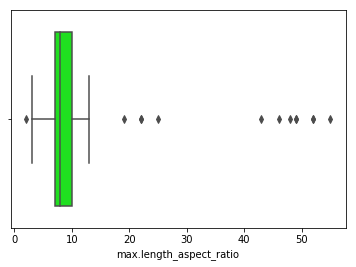

scatter_ratio


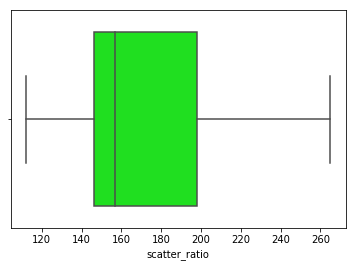

elongatedness


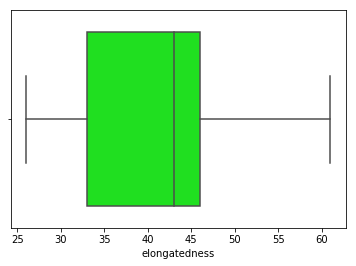

pr.axis_rectangularity


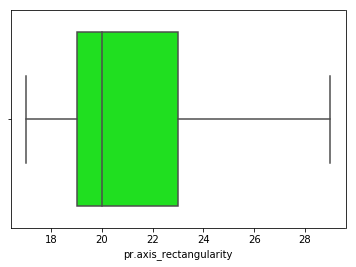

max.length_rectangularity


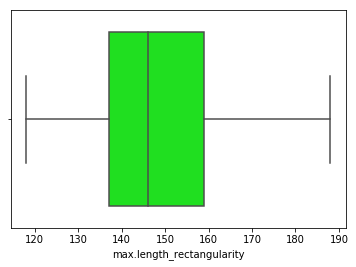

scaled_variance


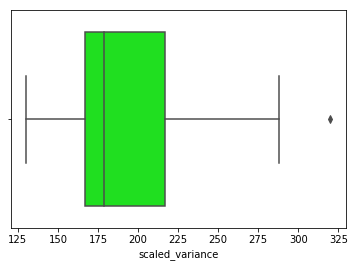

scaled_variance.1


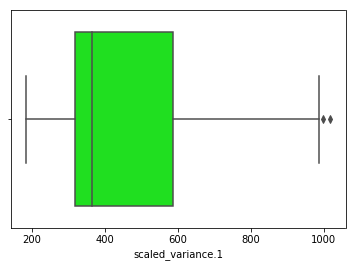

scaled_radius_of_gyration


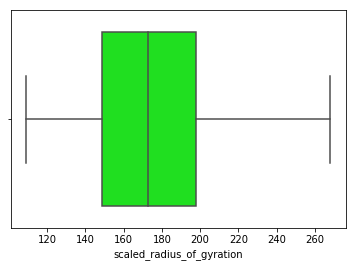

scaled_radius_of_gyration.1


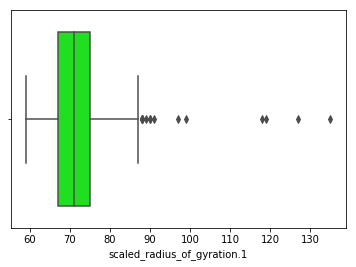

skewness_about


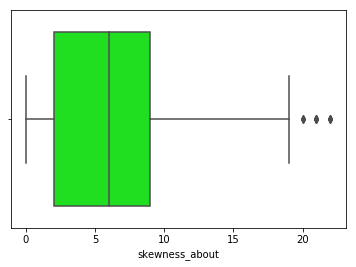

skewness_about.1


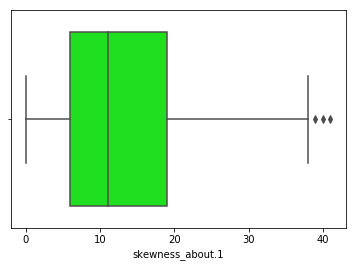

skewness_about.2


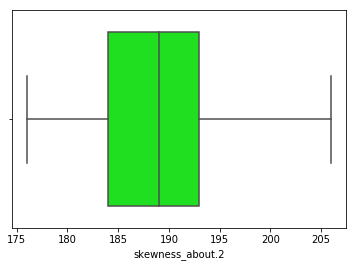

hollows_ratio


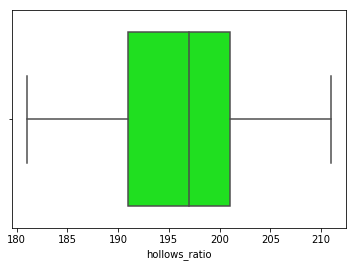

class


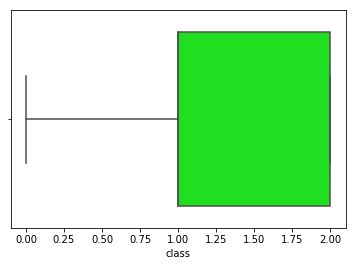

In [534]:

for i,j in enumerate(vehical.columns):
    print(j)
    plt.figure(i)
    sns.boxplot(vehical[j],color='lime')
    plt.show()

In [535]:
# we can see some outliers in our dataset and i am going to remove this in next step. In a normal distribution almost all the values — about 99.7%, fall within 3 σ deviation from the mean 
# so applying z score to remove outliers
Vehical_zscore=vehical[(np.abs(zscore(vehical)<3).all(axis=1))]

compactness


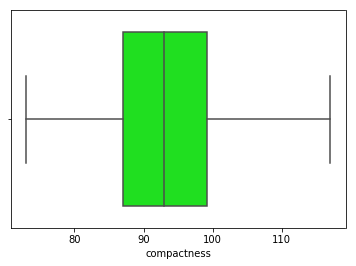

circularity


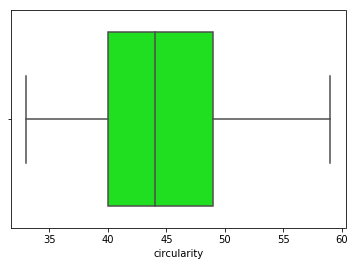

distance_circularity


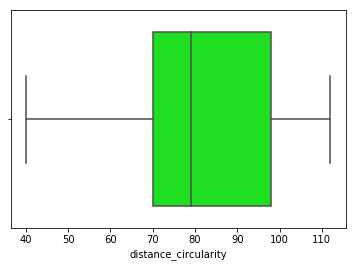

radius_ratio


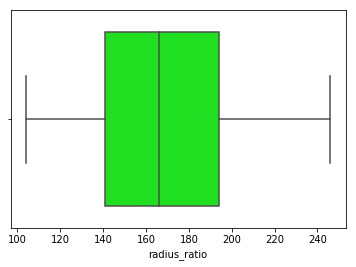

pr.axis_aspect_ratio


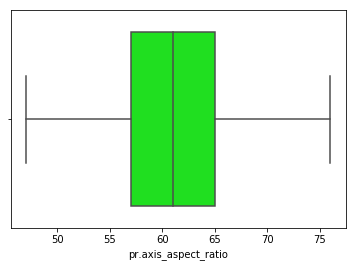

max.length_aspect_ratio


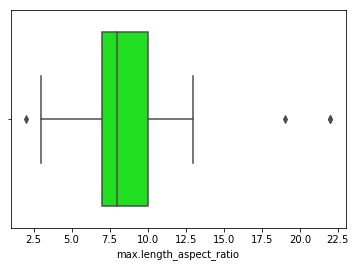

scatter_ratio


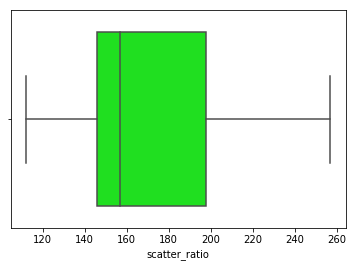

elongatedness


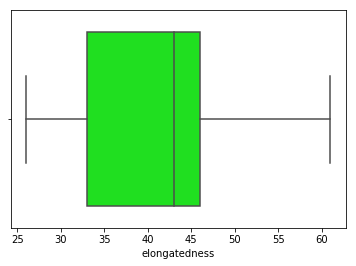

pr.axis_rectangularity


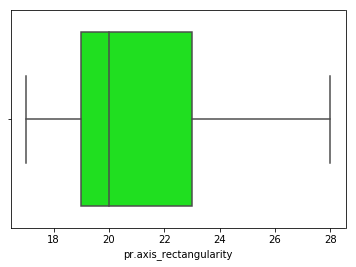

max.length_rectangularity


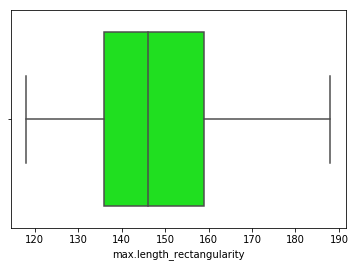

scaled_variance


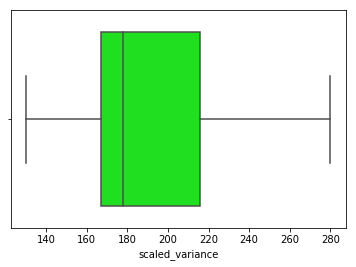

scaled_variance.1


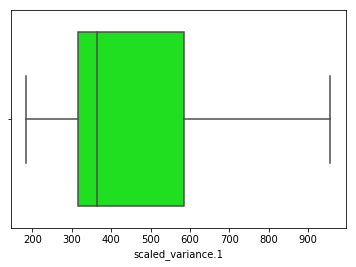

scaled_radius_of_gyration


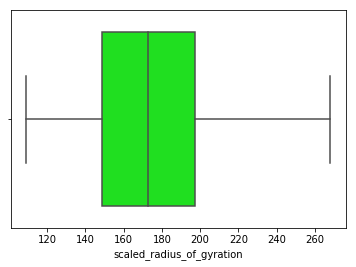

scaled_radius_of_gyration.1


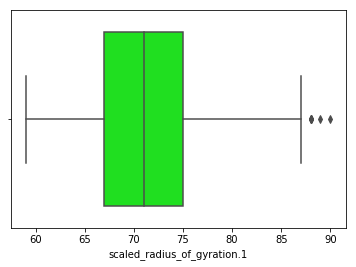

skewness_about


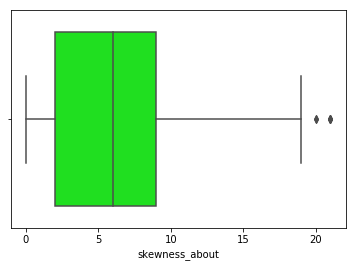

skewness_about.1


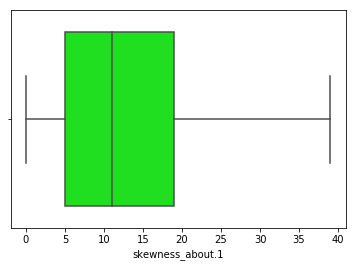

skewness_about.2


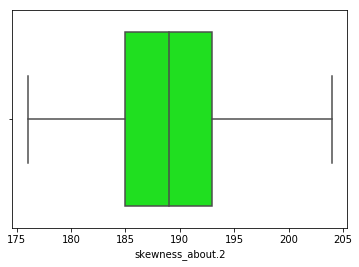

hollows_ratio


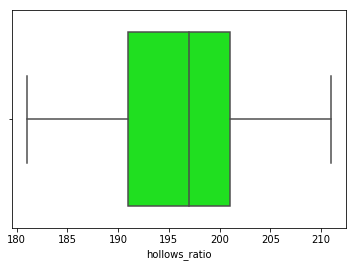

class


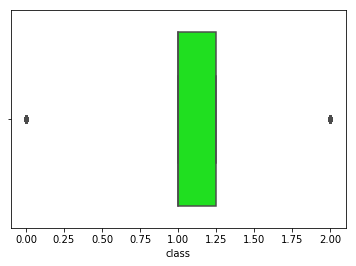

In [536]:
# we succesfully removed the outliers and we can see below

for i,j in enumerate(Vehical_zscore.columns):
    print(j)
    plt.figure(i)
    sns.boxplot(Vehical_zscore[j],color='lime')
    plt.show()

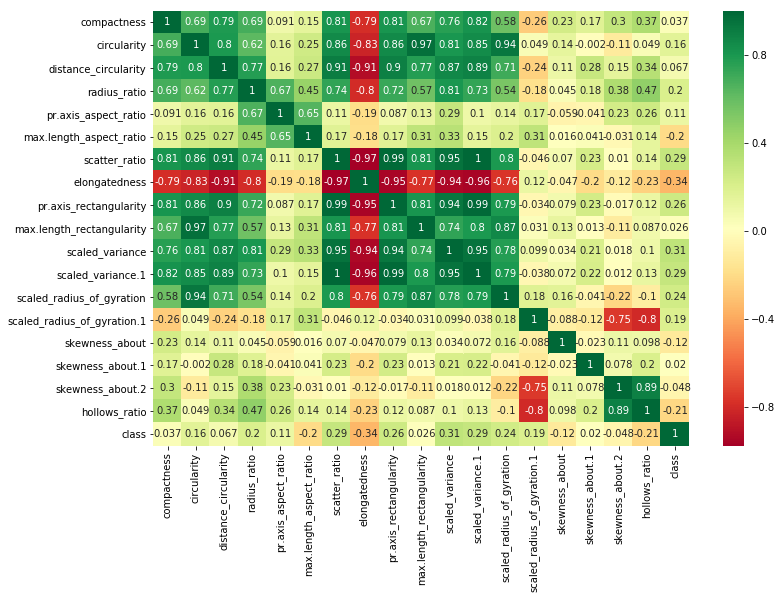

In [537]:
# Finding the correlation of the data with heatmap
plt.figure(figsize=(12,8))
sns.heatmap((vehical.corr()),annot=True,cmap='RdYlGn')

In [538]:
#Now i am considering the chi2 test to sleect the best suited variables
select_kbest=SelectKBest(chi2).fit(Vehical_zscore.drop(columns='class'),Vehical_zscore['class'])

In [539]:
(pd.DataFrame(select_kbest.scores_,index=Vehical_zscore.columns.values[0:18],columns=['scores'])).sort_values('scores',ascending=False)

#Scaled_variance.1,scatter_ratio,radius_ratio is top three columns which decide Type of vehicale

,scores
scaled_variance.1,12651.882735
scatter_ratio,1242.091130
radius_ratio,1130.867259
scaled_variance,934.113738
distance_circularity,530.136642
scaled_radius_of_gyration,430.710404
skewness_about.1,422.244754
elongatedness,322.377378
skewness_about,112.622761
max.length_aspect_ratio,82.306635


In [540]:
# i am dropping skewness_about.2 as its not significant
Vehical_zscore=Vehical_zscore.drop(columns='skewness_about.2')

In [541]:
#spliting Feature and target
Feature=Vehical_zscore.drop(columns='class')
Target=Vehical_zscore['class']


C:\Users\Veni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


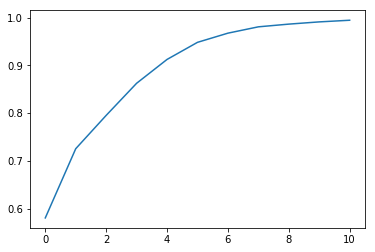

In [542]:
Feature=scale(Feature)
pca=PCA(n_components=11).fit(Feature)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
pca=pca.fit_transform(Feature)

In [543]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.05,0.5,1]}
svc = SVC(gamma="scale")
clf=GridSearchCV(svc,parameters)
clf.fit(pca,Target)

C:\Users\Veni\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.01, 0.05, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [544]:
clf.best_estimator_ #with c=1, rbf kernal will be the best estimators

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [545]:
Xr,Xt,Yr,Yt=train_test_split(pca,Target,test_size=0.20,random_state=4)

In [546]:
model=SVC(1,kernel='rbf',gamma="scale").fit(Xr,Yr)

In [547]:
Ypred=model.predict(Xt)

In [548]:
accuracy_score(Yt,Ypred) #accuracy_score

0.9748427672955975

In [550]:
recall_score(Yt,Ypred,average=None)

array([0.96428571, 0.96551724, 1.        ])

In [552]:
precision_score(Yt,Ypred,average=None)

array([0.93103448, 0.98823529, 0.97777778])